### Linear Regression 
##### Working with the dataset used for "Auto-mpg dataset Mileage per gallon performances of various cars" from Kaggle. Dataset is in the public domain (https://www.kaggle.com/uciml/autompg-dataset/home)

The data contains mostly technical spec of some cars and originated at UCI Machine Learning Repository.

NOTE: This is a pretty clean dataset and suitable here since we are focusing on performing linear regression rather than EDA on this dataset.

In [1]:
# as per usual, import the main libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# I want to ignore 'FutureWarning' events to keep this demo clean
# there is a future warning related to seaborn and scipy but we needn't worry about it
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# grab the data from local file system
df =pd.read_table('auto-mpg.data-original.txt', delim_whitespace=True, names=
                  ('mpg','cylinders','displacement','horsepower','weight','acceleration',
                   'year','origin','car name'))

# info summary about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   year          406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [3]:
# replace mpg and horsepower columns with missing data with respective median values
df['mpg'].fillna(value=df['mpg'].median(), inplace=True)
df["horsepower"].fillna(value=df["horsepower"].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           406 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    406 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   year          406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [4]:
# there should not be any NaN values left
ls = df.columns.tolist()
df[ls].isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
car name        0
dtype: int64

<AxesSubplot:xlabel='mpg', ylabel='Density'>

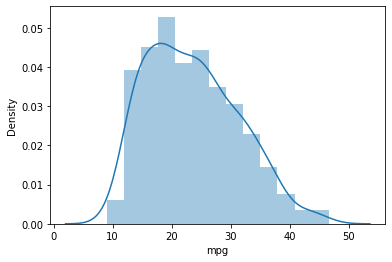

In [5]:
# a distribution plot of mpg
sns.distplot(df['mpg'])

<AxesSubplot:>

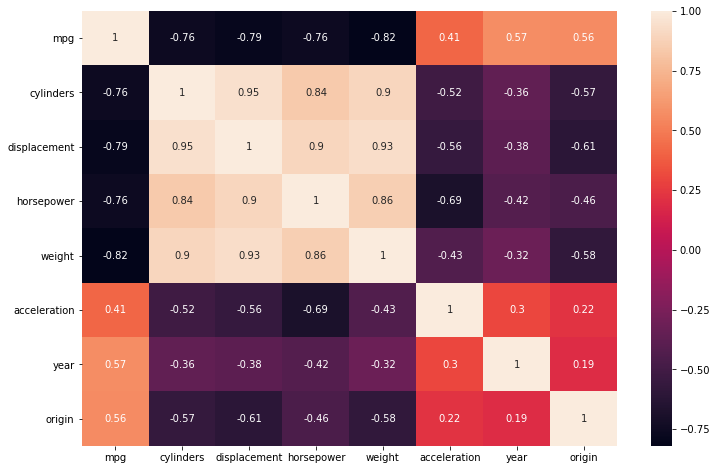

In [6]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr().round(2), annot = True)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

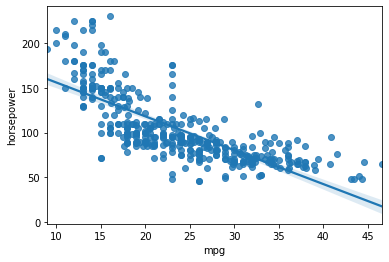

In [7]:
# plot horsepower versus mpg for example, this relationship is clearly not linear
sns.regplot(y=df['horsepower'], x=df['mpg'])

In [8]:
# we split our data into:
# X array containing the features we'll use to train the model
# y array that contains the target variable which is mpg
# we won't include car name, since it is text data that we can't use at this point for this demo
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df['mpg']

In [9]:
from sklearn.model_selection import train_test_split
# uncomment next line and press shift+tab to see more information about this utility
# train_test_split

In [10]:
# use tuple unpacking to generate the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# first, let's create a linear model 'lm' using the imported linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
# if you type lm. and press tab, it will show all the available methods
# for our demo, we call the fit() method on our linear model to train the model with the training data
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
# now we can have a preliminary look at our model by checking out the coefficients and
# interpreting them - first, the intercept, then the coefficients
print(lm.intercept_)
# then the coeffs of each feature
lm.coef_

-6.062462083944212


array([-0.62733896,  0.02275505, -0.02105105, -0.00652269, -0.16180844,
        0.66219472,  1.59647696])

In [14]:
# now we create a dataframe passing the coefficients as the data, X.columns as the index, and set columns = Coefficients
codf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficients'])

# we interpret the coefficient as the average effect on Y (the target) of a one unit increase in X
# holding all other predictors fixed
codf

,Coefficients
cylinders,-0.627339
displacement,0.022755
horsepower,-0.021051
weight,-0.006523
acceleration,-0.161808
year,0.662195
origin,1.596477


In [15]:
# now let's get some predictions
predicts = lm.predict(X_test)
predicts[0:5]

array([13.06771521, 17.3711051 , 20.75527148,  8.91748045, 18.14740008])

<AxesSubplot:xlabel='mpg'>

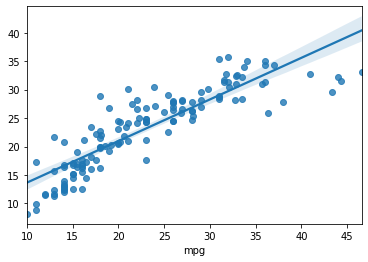

In [16]:
# so how well did the model do?
sns.regplot(x=y_test, y=predicts)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

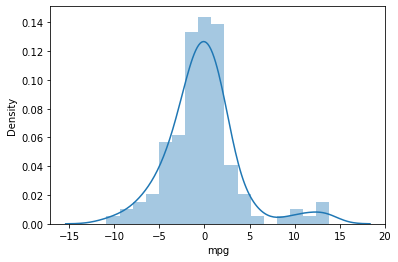

In [17]:
# a histogram displaying residuals is further validation
# residuals = distance between actual and predicted values
sns.distplot((y_test - predicts))

If the residuals are normally distributed, that means we chose a good model for the data<br>
Now this is slightly off, and there could be many reasons for that

### Evaluating our Linear Regression model


##### Mean Absolute Error (MAE) 
\begin{equation*}
\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i| 
\end{equation*}

##### Mean Squared Error (MSE)
\begin{equation*}
\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2 
\end{equation*}

##### Root Mean Squared Error (RMSE)
\begin{equation*}
\sqrt {\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2} 
\end{equation*}

##### Coefficient of Determination (R$^{2}$)
\begin{equation*}
1 - \frac {RSS}{TSS}
\end{equation*}
<br>
\begin{equation*}
TSS = \sum(y_i-\overline{y})^2
\end{equation*}
<br>
\begin{equation*}
RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2
\end{equation*}

In [18]:
# let's import the metrics and use them
# these are 'loss functions' since we want to try to minimize these
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predicts))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predicts))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicts)))

Mean Absolute Error (MAE): 2.7654115573207987
Mean Squared Error (MSE): 16.012325560298287
Root Mean Squared Error (RMSE): 4.001540398433869


In [20]:
# lm.score() -> returns the coefficient of determination (R^2)
# it's a measure of how well observed outcomes are replicated by the model, as the proportion 
# of total variation of outcomes explained by the model
print(lm.score(X_test,y_test))

0.7640453746153424


In [21]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [22]:
path = 'C:/Users/aravi/Downloads/pkl_file/lr.pkl'

In [23]:
import pickle
with open(path,'wb') as file:
    pickle.dump(lm, file)
    

In [24]:
with open(path,'rb') as file:
    model = pickle.load(file)

In [25]:
model.predict([[8.0,307.0,130.0,3504.0,12.0,70.0,1.0]])

array([16.32089267])